In [1]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

In [2]:
series = pd.read_csv('data_johns_hopkins_sum_12-12-2020.csv')
series

,Unnamed: 0,state,date,code,total_population,new_cases,new_deaths
0,0,Alabama,2020-01-22,AL,4887871.0,0.0,0.0
1,1,Alabama,2020-01-23,AL,4887871.0,0.0,0.0
2,2,Alabama,2020-01-24,AL,4887871.0,0.0,0.0
3,3,Alabama,2020-01-25,AL,4887871.0,0.0,0.0
4,4,Alabama,2020-01-26,AL,4887871.0,0.0,0.0
...,...,...,...,...,...,...,...
16570,16570,Wyoming,2020-12-07,WY,577737.0,668.0,23.0
16571,16571,Wyoming,2020-12-08,WY,577737.0,490.0,0.0
16572,16572,Wyoming,2020-12-09,WY,577737.0,410.0,10.0
16573,16573,Wyoming,2020-12-10,WY,577737.0,338.0,0.0


            new_cases
datetime             
2020-01-22        0.0
2020-01-23        0.0
2020-01-24        0.0
2020-01-25        0.0
2020-01-26        0.0


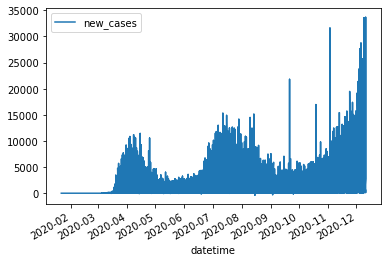

In [10]:
series = read_csv('data_johns_hopkins_sum_12-12-2020.csv', header=0, index_col=0, squeeze=True)
datetimeCol = []
for i in series['date']:
    datetimeCol.append(parser(i))
series['datetime'] = datetimeCol
series = series.set_index('datetime')
series = series[['new_cases']]
print(series.head())
series.plot()
pyplot.show()
latest_series = series

In [11]:
ARIMA?

In [12]:
# new_series=series[['new_cases']]
# latest_series=new_series.groupby(['date']).sum()
# latest_series.plot()

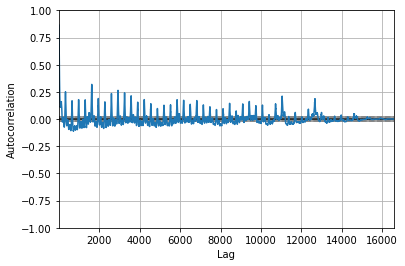

In [13]:
autocorrelation_plot(latest_series)
pyplot.show()

/Users/Jen/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jen/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/Jen/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Jen/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                16574
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -135990.881
Method:                       css-mle   S.D. of innovations            885.473
Date:                Mon, 14 Dec 2020   AIC                         271995.763
Time:                        16:42:13   BIC                         272049.772
Sample:                             1   HQIC                        272013.595
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0339      3.010      0.011      0.991      -5.865       5.933
ar.L1.D.new_cases    -0.5502      0.008    -71.076      0.000      -0.565      -0.535
ar.L2.D.new_cases    -0.

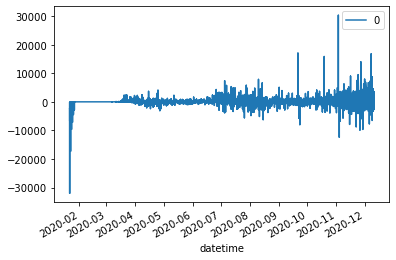

                  0
count  16574.000000
mean      -0.011262
std      885.500202
min   -32026.089976
25%      -55.465406
50%       -0.077494
75%       68.650275
max    30310.584950


In [14]:
model = ARIMA(latest_series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
print(residuals.describe())

In [ ]:
# predict_2020 = model.predict(latest_series)

# results_df = pd.DataFrame(latest_series)
# results_df['predicted'] = model.predict(predict_2020)

regression: R2 (.score()), MSE
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

(lower the better)

In [ ]:
import numpy as np
np.average(residuals ** 2)